# Introduction

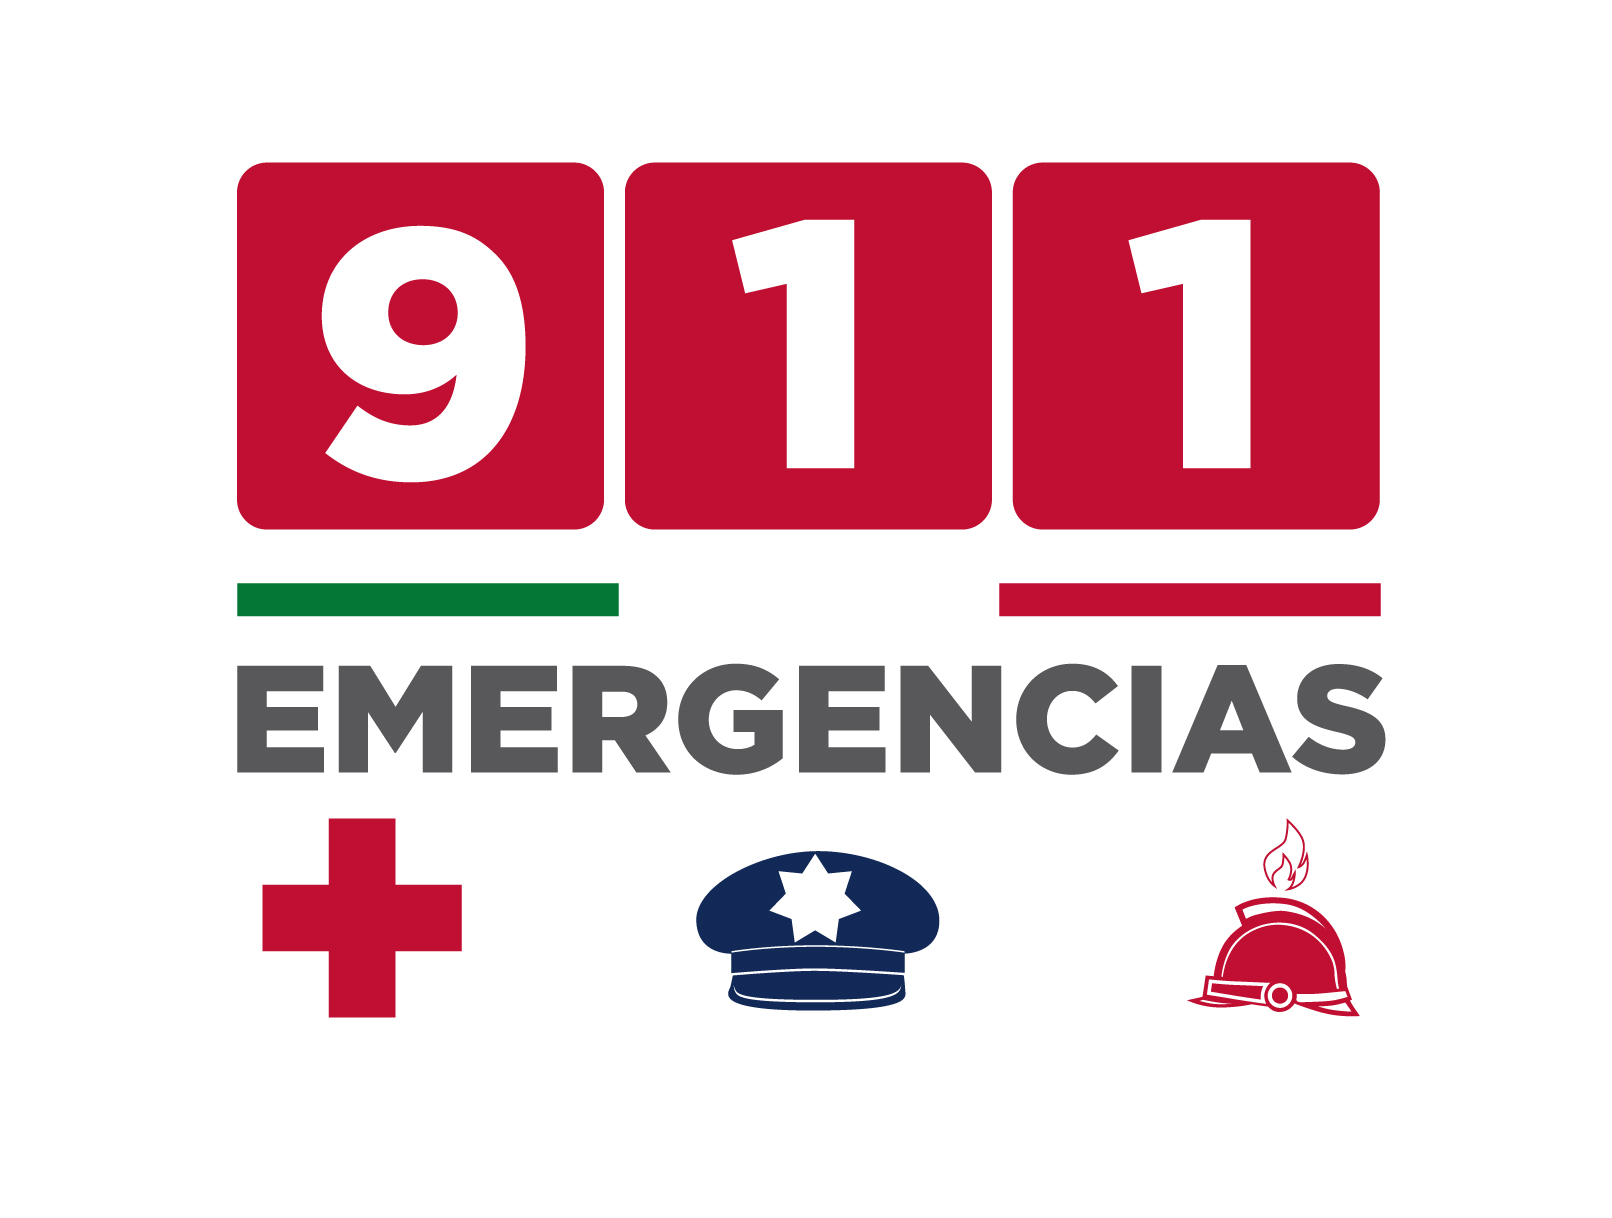

### 911 Calls EDA

This dataset contains emergency calls from Montgomery County, PA.<br>

<b>Montgomery County</b>,is Maryland's most populous jurisdiction and its most affluent. The County is located adjacent to the nation's capital, Washington, D.C., and includes 497 square miles of land area. The topography is rolling with small hills.<br>

<b>911 Calls</b>

Created by Congress in 2004 as the 911 Implementation and Coordination Office (ICO), the National 911 Program is housed within the National Highway Traffic Safety Administration at the U.S. Department of Transportation and is a joint program with the National Telecommunication and Information Administration in the Department of Commerce.

The <b>911</b> call data is from [Kaggle](https://www.kaggle.com/mchirico/montcoalert).

Feature Columns : <br>
- <b>lat</b> : Latitude<br>
- <b>lng</b> : Longitude<br>
- <b>desc</b> : Description of the Emergency Call<br>
- <b>zip</b> : Zipcode<br>
- <b>title</b> : Title<br>
- <b>timestamp</b> : Timestamp, YYYY-MM-DD HH:MM:SS<br>
- <b>twp</b> : Township<br>
- <b>addr</b> : Address<br>
- <b>e</b> : Dummy variable<br>

In [102]:
#importing necessary libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

In [103]:
#reading dataset
emergency = pd.read_csv("D:\\Projects\\911.csv")
emergency.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [104]:
#shape of data
emergency.shape

(663522, 9)

#### The dataset have 9 columns and have more then 6Lakhs entries

In [105]:
#info of dataset
emergency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


#### We can see that all the columns can be used for our analysis except column "e" we will check the type of value it is holding

In [106]:
#checking e
emergency['e'].unique()

array([1], dtype=int64)

#### It is having one value 1 so we can drop it from our analysis

In [107]:
#dropping e
emergency.drop(['e'],inplace=True,axis=1)

In [108]:
#checking null value
emergency.isnull().sum()/emergency.shape[0]*100

lat           0.000000
lng           0.000000
desc          0.000000
zip          12.086864
title         0.000000
timeStamp     0.000000
twp           0.044158
addr          0.000000
dtype: float64

#### For now we will not impute the zip code with other value as the zip code will be unique depending on areas so imputing them with something can possibly affect our analysis.

#### From the desc column we can split the info and try to get 2 info reason for call & Issue also convert timestamp column to proper format so that it can used for analysis

In [109]:
# Applying Function to split the desc
emergency['reason']=emergency['title'].apply(lambda x : x.split(': ')[0])
emergency['issue']=emergency['title'].apply(lambda x : x.split(': ')[1])

In [110]:
#The timestamp dataframe is now being converted to datatime format for easier analysis 
emergency[['timeStamp']]=emergency[['timeStamp']].apply(pd.to_datetime)

In [111]:
#From the timestamp get month , year , hour and day of week to get more clear idea
emergency['month']=emergency['timeStamp'].dt.month
emergency['year']=emergency['timeStamp'].dt.year
emergency['hour']=emergency['timeStamp'].dt.hour
emergency['day']=emergency['timeStamp'].dt.dayofweek

In [112]:
#using map function to give more asthetic look to the month and day column
#For day
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
emergency['day']=emergency['day'].map(dmap)
#For month
mmap = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}
emergency['month']=emergency['month'].map(mmap)

In [113]:
emergency.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,reason,issue,month,year,hour,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,Dec,2015,17,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,Dec,2015,17,Thu


#### Now we will start with the analysis !!

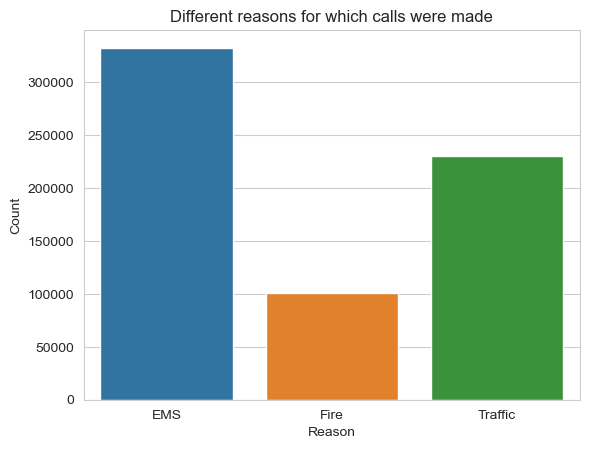

In [114]:
#Count of calls for reasons
sns.countplot(data=emergency,x='reason')
plt.title('Different reasons for which calls were made')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.show()

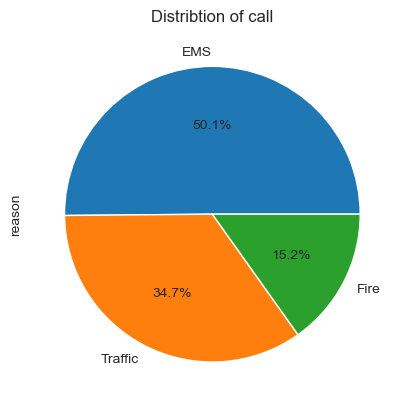

In [115]:
#Now we will check how much in % calls are distributed
emergency['reason'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribtion of call')
plt.show()

#### The most number of calls were made for EMS related emergencies which is more then 50% of total calls being made followed by Traffic and Fire.

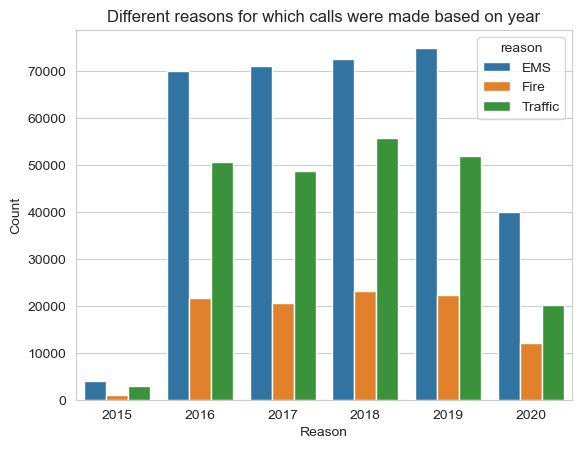

In [116]:
#Count of calls based on reason per year
sns.countplot(data=emergency,hue='reason',x='year')
plt.title('Different reasons for which calls were made based on year')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.show()

###### As we can see the count keep of calls keep on increasing for EMS although the Traffic is showing mixed trend but Fire related calls are also increasing. 

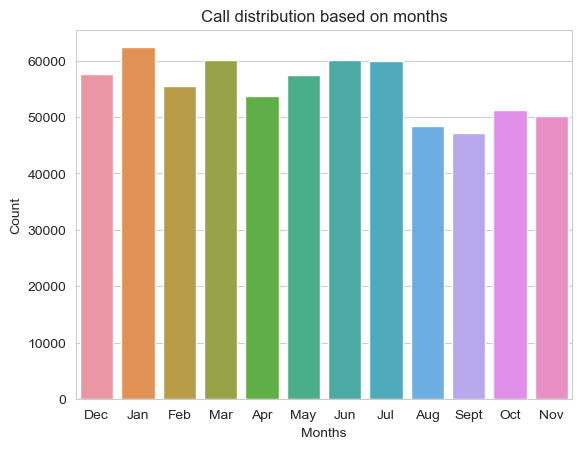

In [117]:
sns.countplot(data=emergency,x='month')
plt.title('Call distribution based on months')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

###### As we can see the most calls were made during the month of January and least in September.

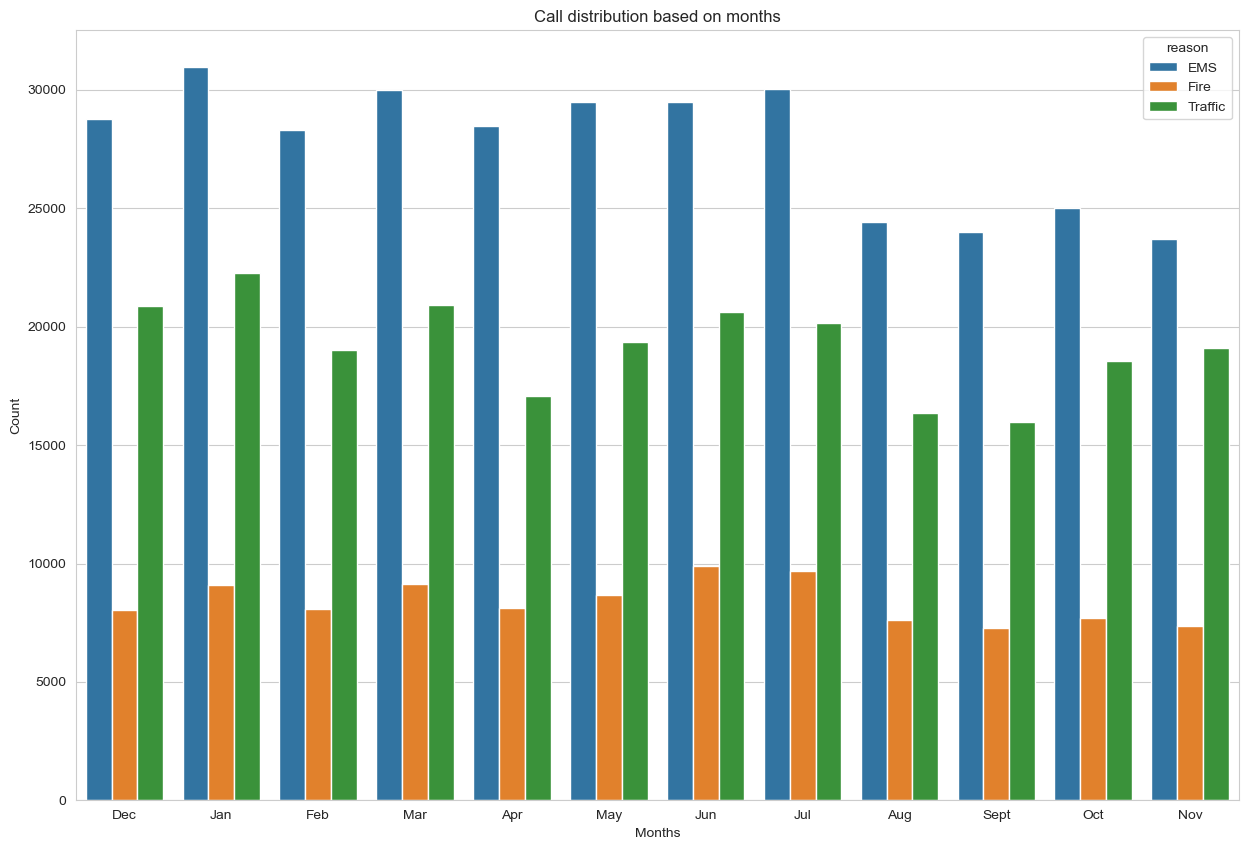

In [118]:
# Reason distribution based on Months
plt.figure(figsize=(15,10))
sns.countplot(data=emergency,x='month',hue='reason')
plt.title('Call distribution based on months')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

#### The count for EMS and Traffic both is highest in the month of January and Fire related is mostly in month of June

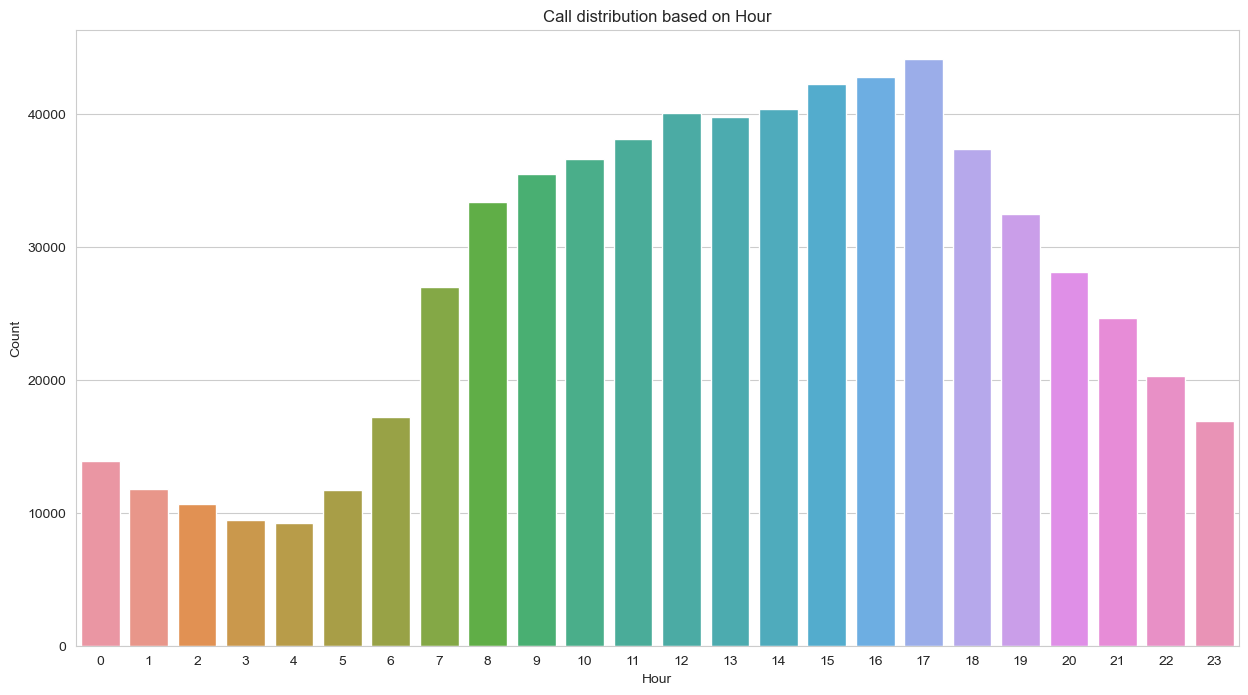

In [119]:
#Call distribution based on hour
plt.figure(figsize=(15,8))
sns.countplot(data=emergency,x='hour')
plt.title('Call distribution based on Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

#### we can see that most number of calls were made at 17:00 Hrs and least being made at 4:00 Hrs.

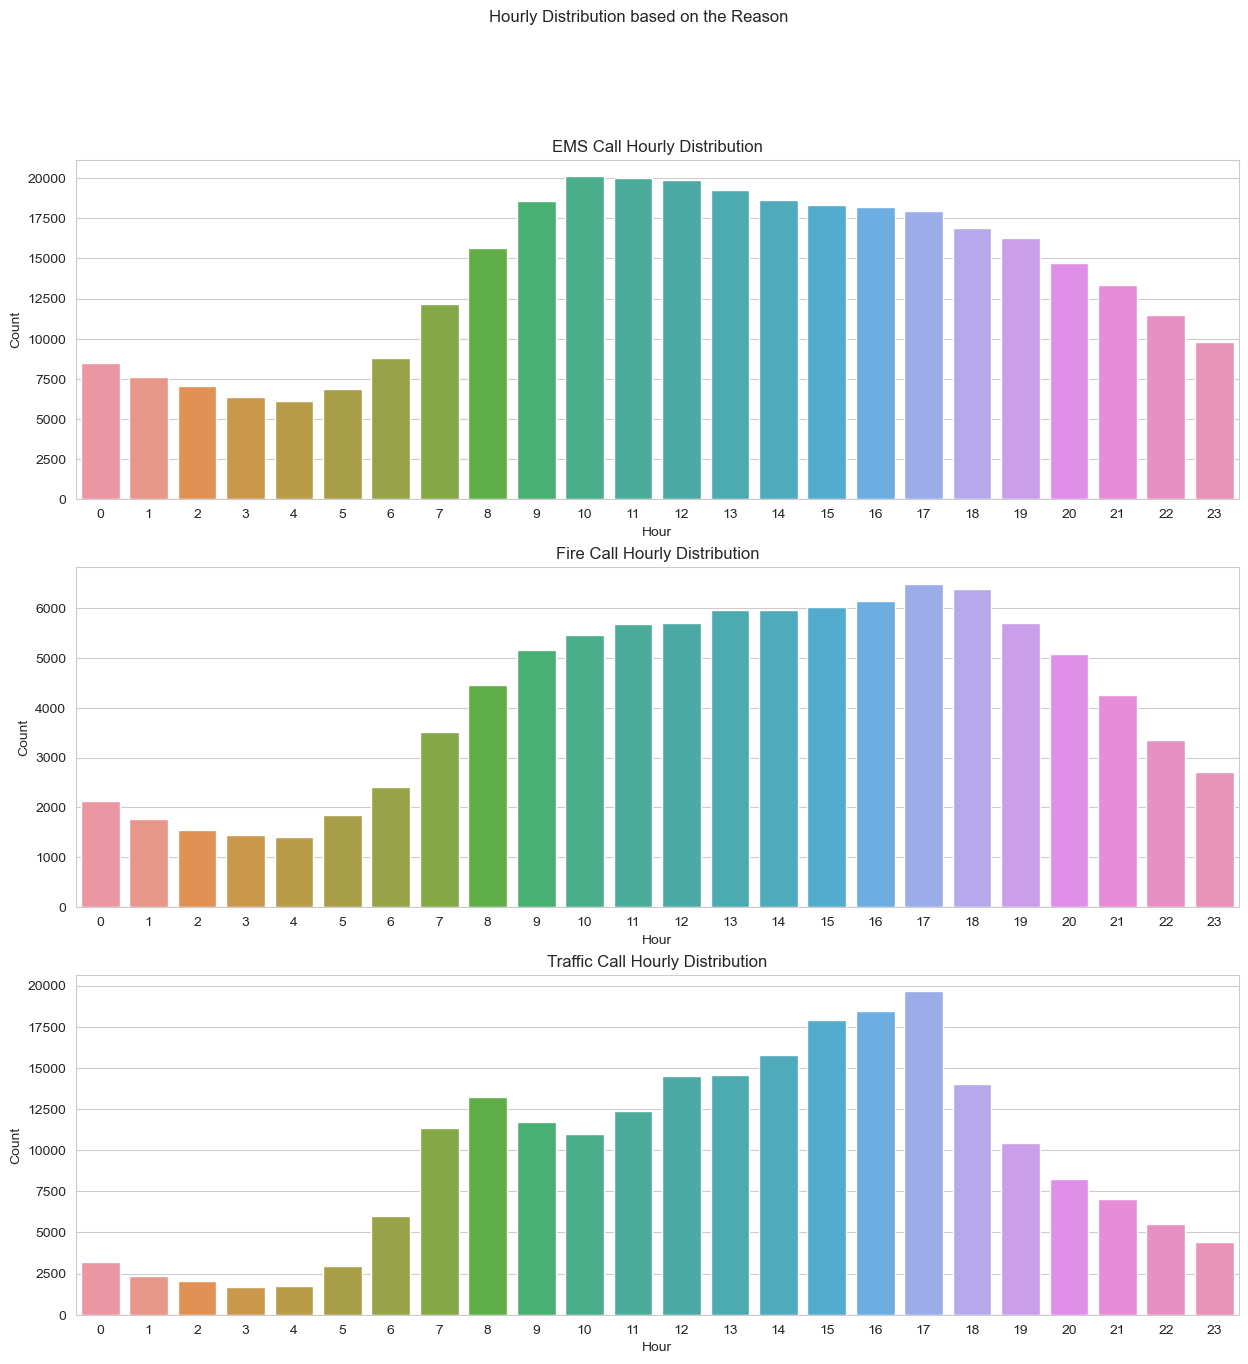

In [120]:
#Checking the hourly plot of different reasons of emergency
fig, axes = plt.subplots(nrows=3,ncols=1,figsize=(15, 15))
emergency_ems=emergency[emergency['reason']=='EMS']
emergency_fire=emergency[emergency['reason']=='Fire']
emergency_traffic=emergency[emergency['reason']=='Traffic']
fig.suptitle('Hourly Distribution based on the Reason')
sns.countplot(ax=axes[0],data=emergency_ems,x='hour')
axes[0].set_title('EMS Call Hourly Distribution')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Count')
sns.countplot(ax=axes[1],data=emergency_fire,x='hour')
axes[1].set_title('Fire Call Hourly Distribution')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Count')
sns.countplot(ax=axes[2],data=emergency_traffic,x='hour')
axes[2].set_title('Traffic Call Hourly Distribution')
axes[2].set_xlabel('Hour')
axes[2].set_ylabel('Count')
plt.show()

#### We can see that for EMS the peak time is around 10 Hrs but for Traffic and Fire have peak time at 17 Hrs 

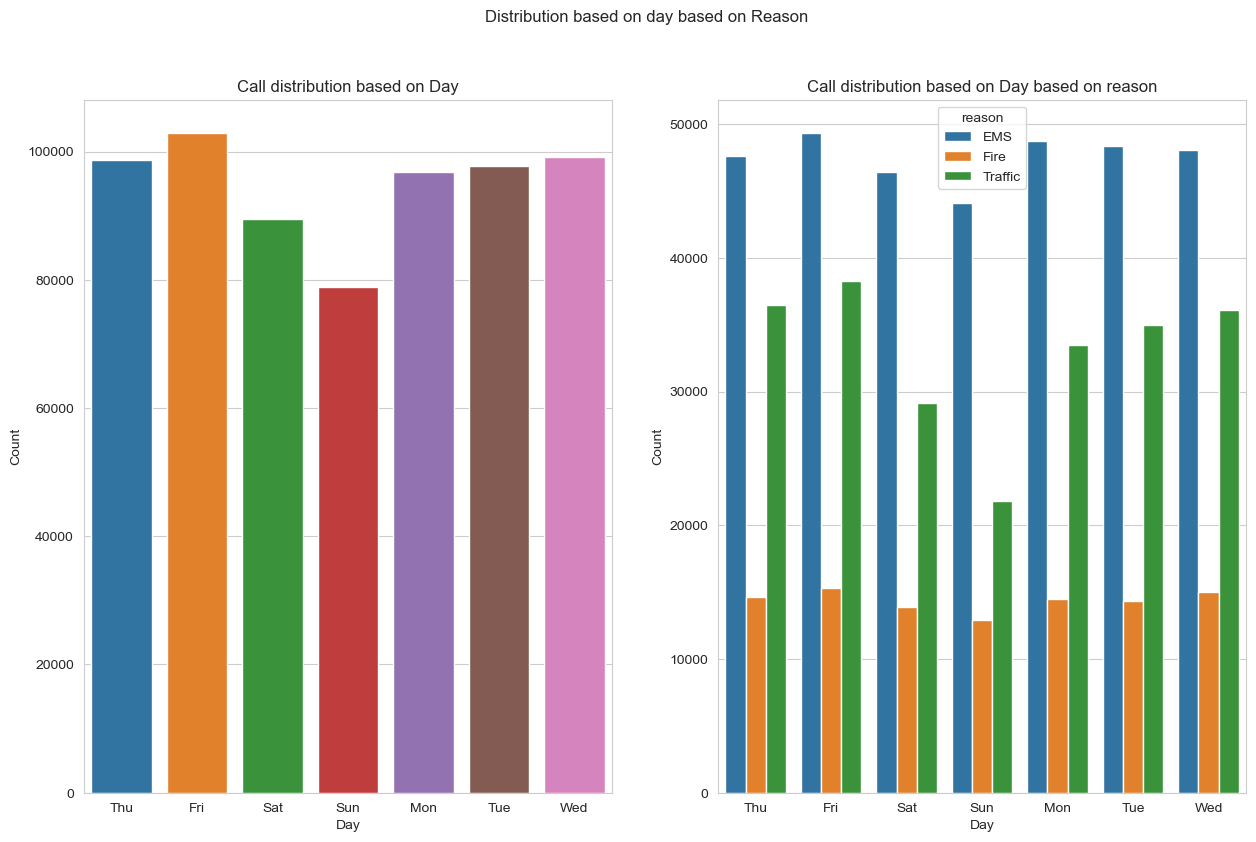

In [121]:
#Count of calls based on day
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15, 9))
fig.suptitle('Distribution based on day based on Reason')
sns.countplot(ax=axes[0],data=emergency,x='day')
axes[0].set_title('Call distribution based on Day')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Count')
sns.countplot(ax=axes[1],data=emergency,x='day',hue='reason')
axes[1].set_title('Call distribution based on Day based on reason')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Count')
plt.show()

#### Friday is the day where most number of calls were made and Friday highest calls were made for all the three reasons.

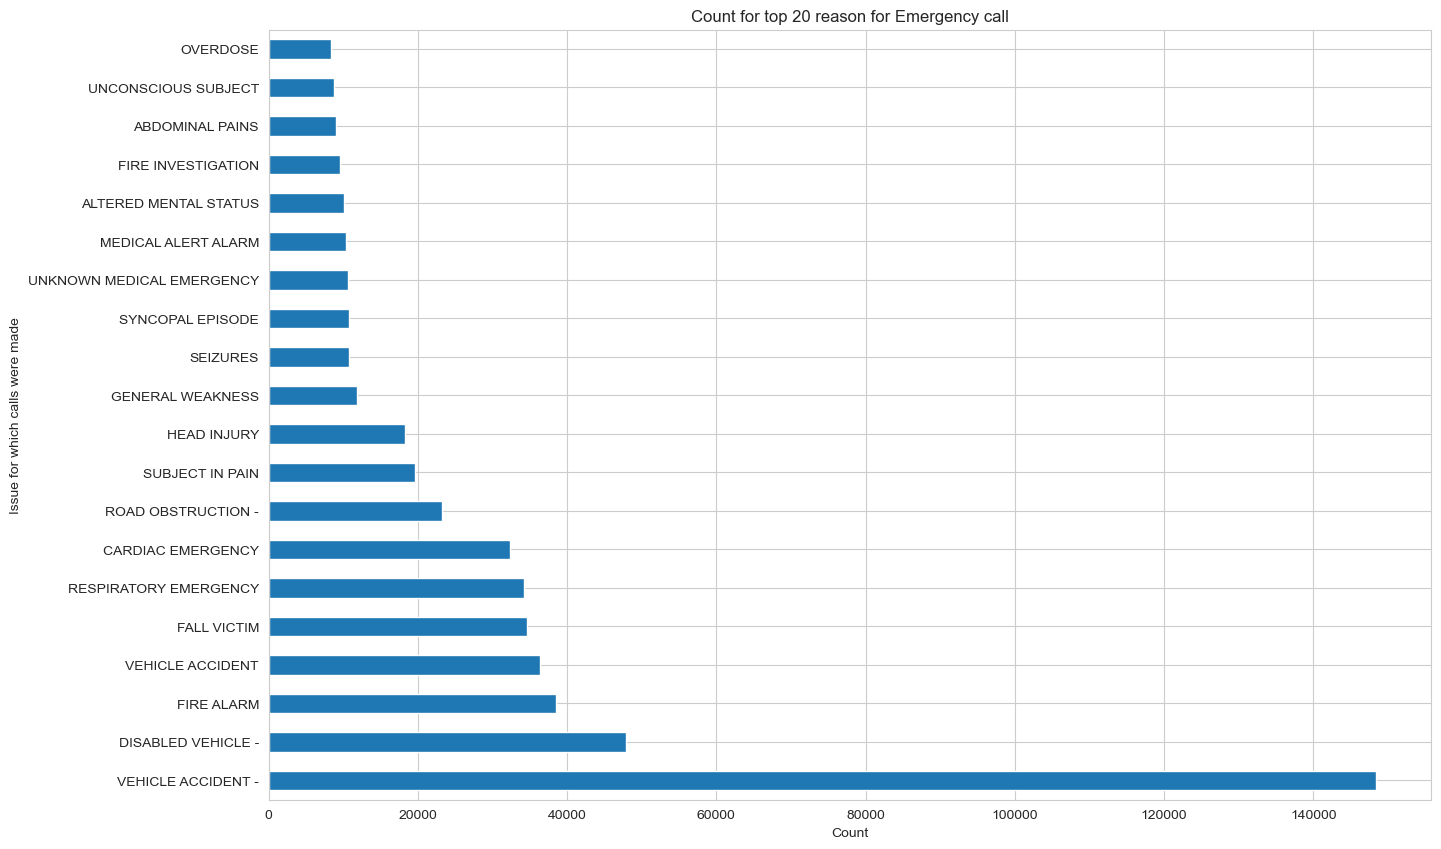

In [122]:
# We will not plot the issue and check the maximum occurance of Top 10 issues
plt.figure(figsize=(15,10))
emergency.groupby('issue').count().sort_values(by='title',ascending=False)['title'][0:20].plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Issue for which calls were made')
plt.title('Count for top 20 reason for Emergency call')
plt.show()

#### We can see that Vehicle accident is the highest issue for call by huge margin

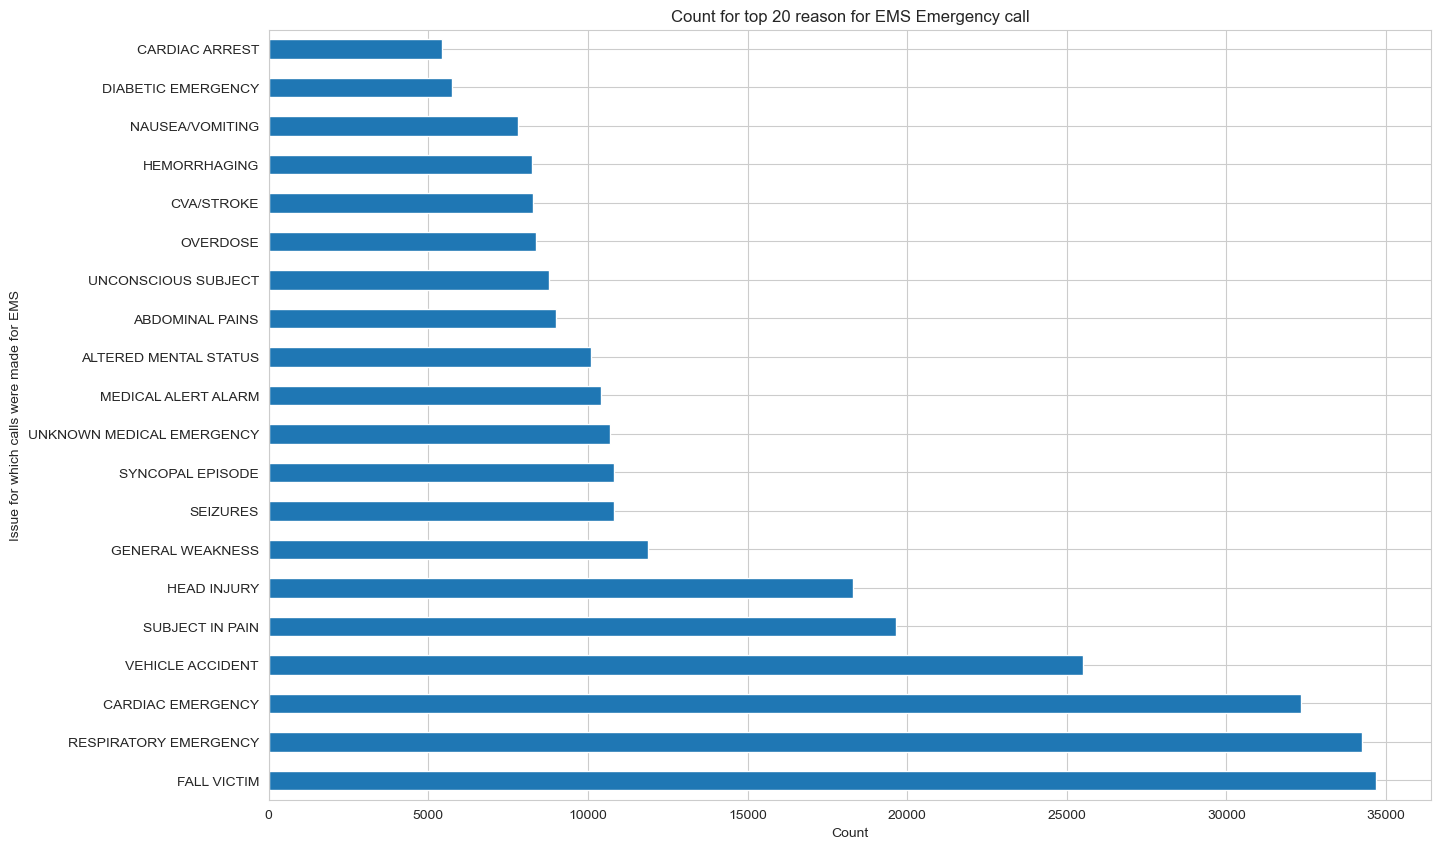

In [123]:
#EMS reason of Emergency call count
plt.figure(figsize=(15,10))
emergency_ems.groupby('issue').count().sort_values(by='title',ascending=False)['title'][0:20].plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Issue for which calls were made for EMS')
plt.title('Count for top 20 reason for EMS Emergency call')
plt.show()

#### The Fall Victim is the highest reason for call followed by Respitory and Cardiac Emergency.

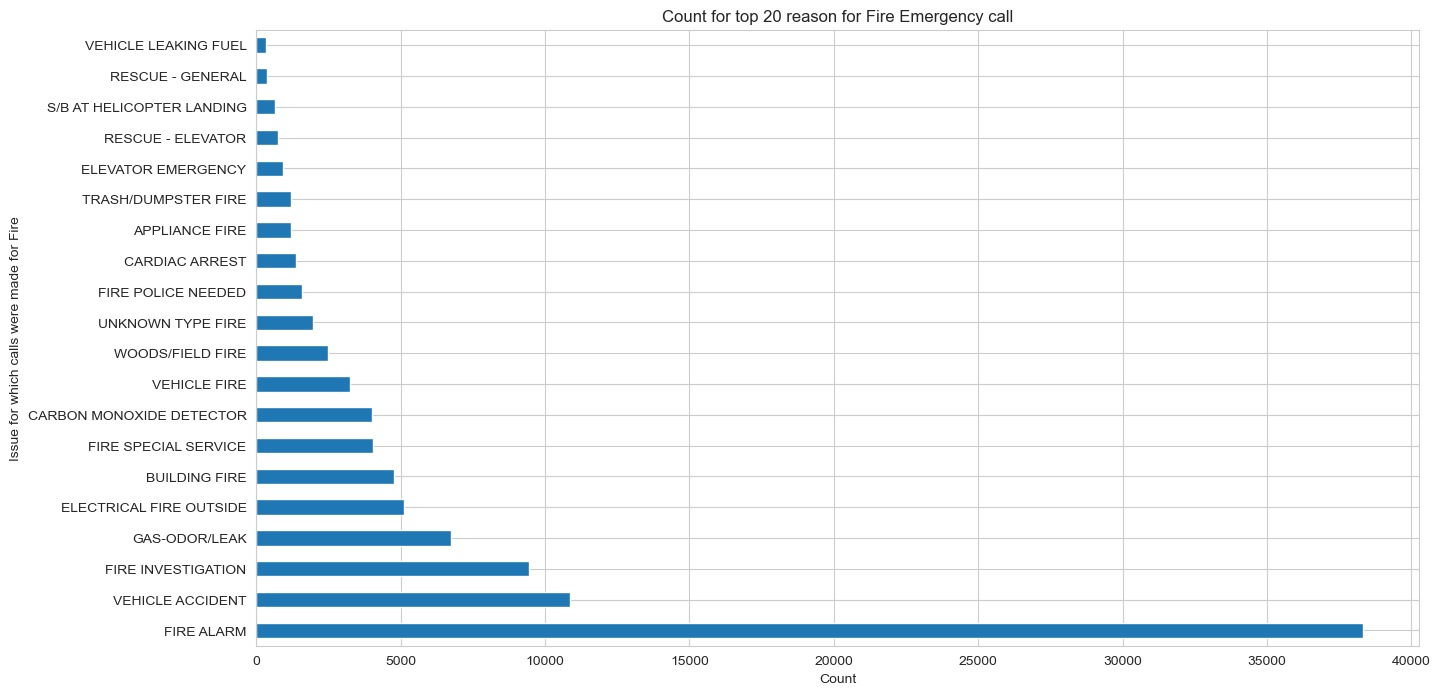

In [124]:
#Fire reason of Emergency call count
plt.figure(figsize=(15,8))
emergency_fire.groupby('issue').count().sort_values(by='title',ascending=False)['title'][0:20].plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Issue for which calls were made for Fire')
plt.title('Count for top 20 reason for Fire Emergency call')

plt.show()

#### The Fire Alarm is the highest reason for call .

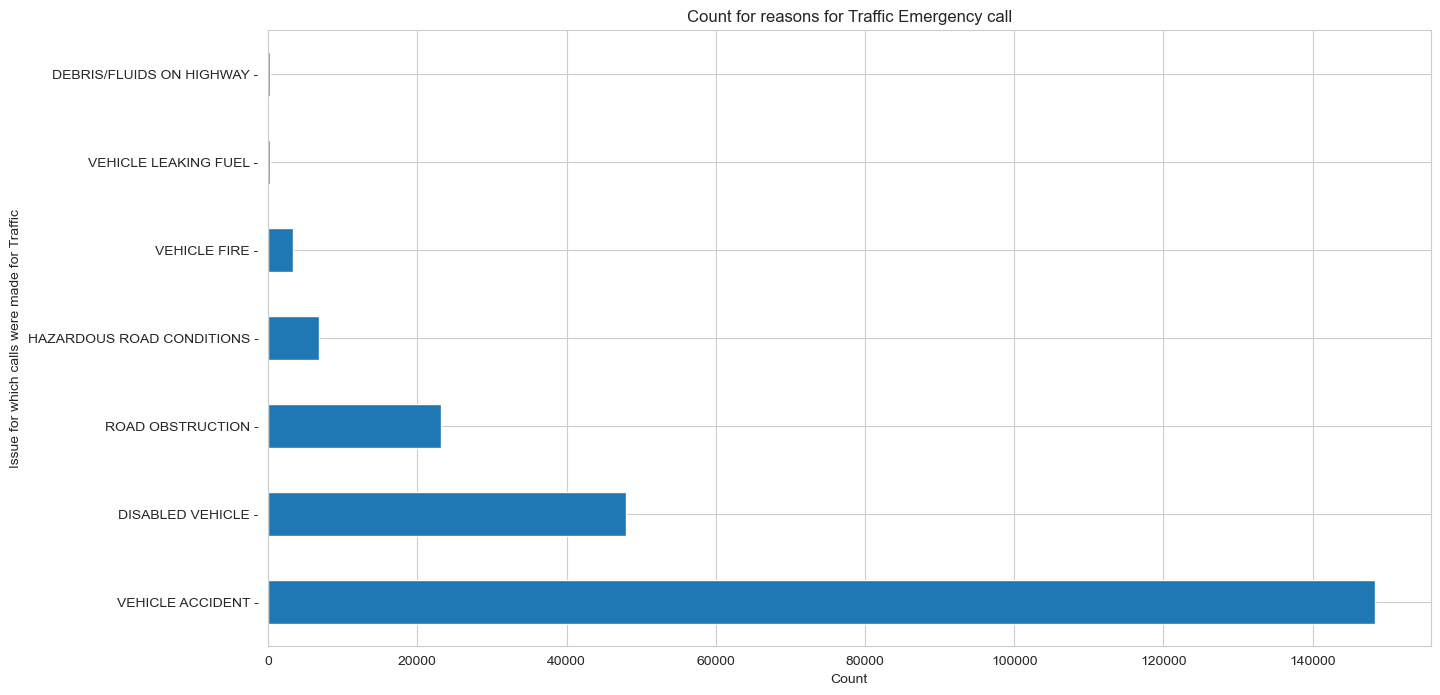

In [125]:
#Traffic reason of Emergency call count
plt.figure(figsize=(15,8))
emergency_traffic=emergency[emergency['reason']=='Traffic']
emergency_traffic.groupby('issue').count().sort_values(by='title',ascending=False)['title'].plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Issue for which calls were made for Traffic')
plt.title('Count for reasons for Traffic Emergency call')
plt.show()

#### The Fall Victim is the highest reason for call followed by Respitory and Cardiac Emergency.

##### We can see that the issue"Vehicle Accident" is atleast in Top3 for in all the three reasons 

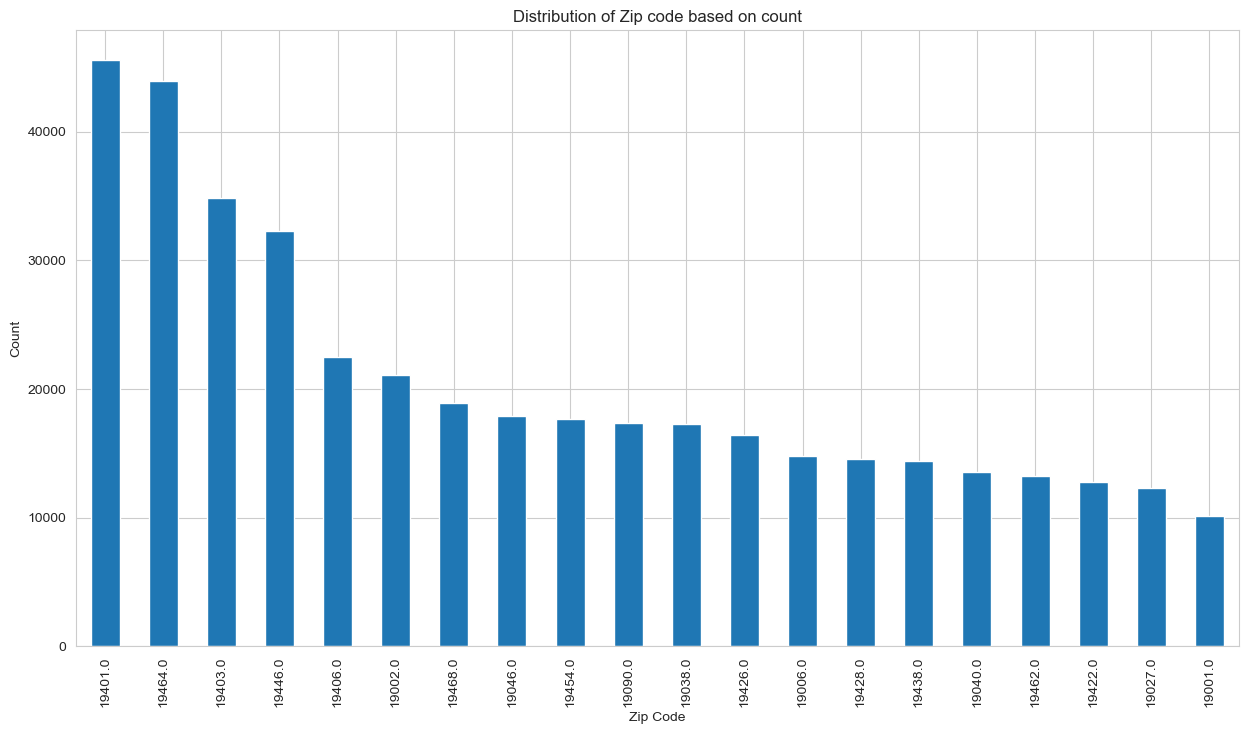

In [126]:
#Count plot based on zip code
plt.figure(figsize=(15,8))
emergency.groupby('zip').count().sort_values(by='title',ascending=False).iloc[0:20]['title'].plot(kind='bar')
plt.xlabel('Zip Code')
plt.ylabel('Count')
plt.title('Distribution of Zip code based on count')
plt.show()

#### We can see that maximum number of calls is coming from 19401 now we will check based on reasons for call.

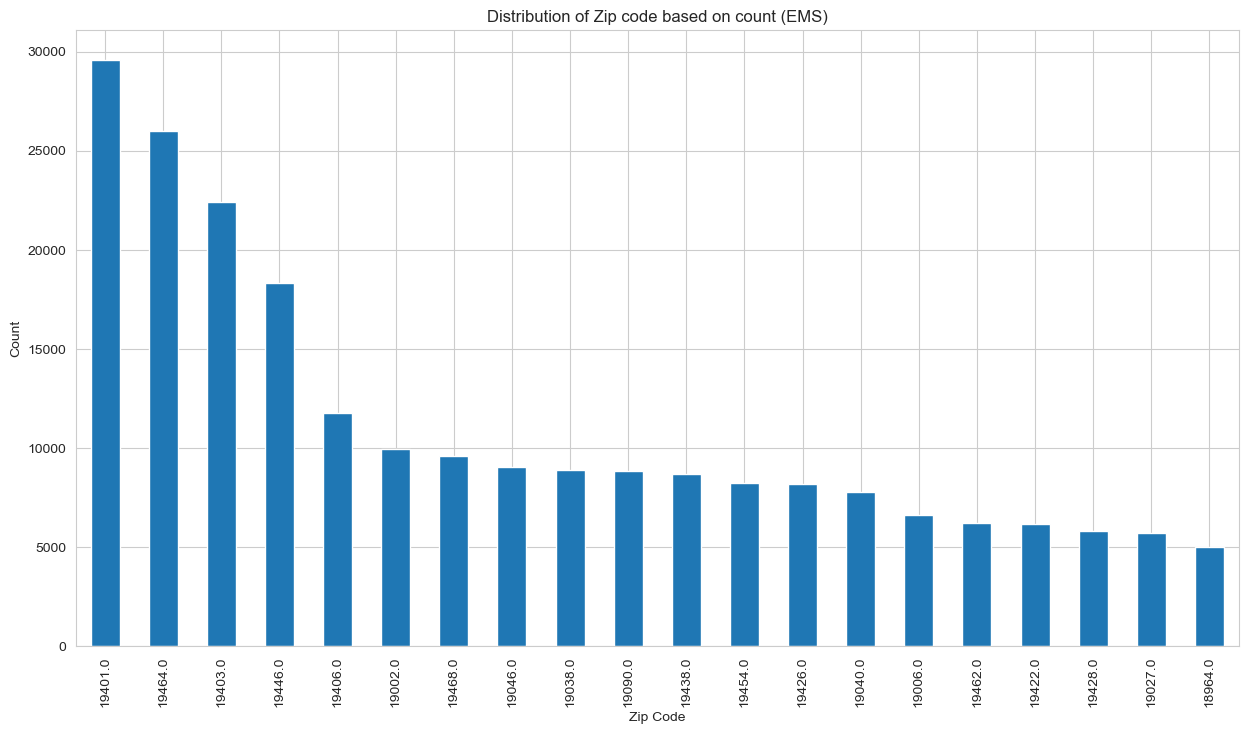

In [127]:
#Count plot based on zip code
plt.figure(figsize=(15,8))
emergency_ems.groupby('zip').count().sort_values(by='title',ascending=False).iloc[0:20]['title'].plot(kind='bar')
plt.xlabel('Zip Code')
plt.ylabel('Count')
plt.title('Distribution of Zip code based on count (EMS)')
plt.show()

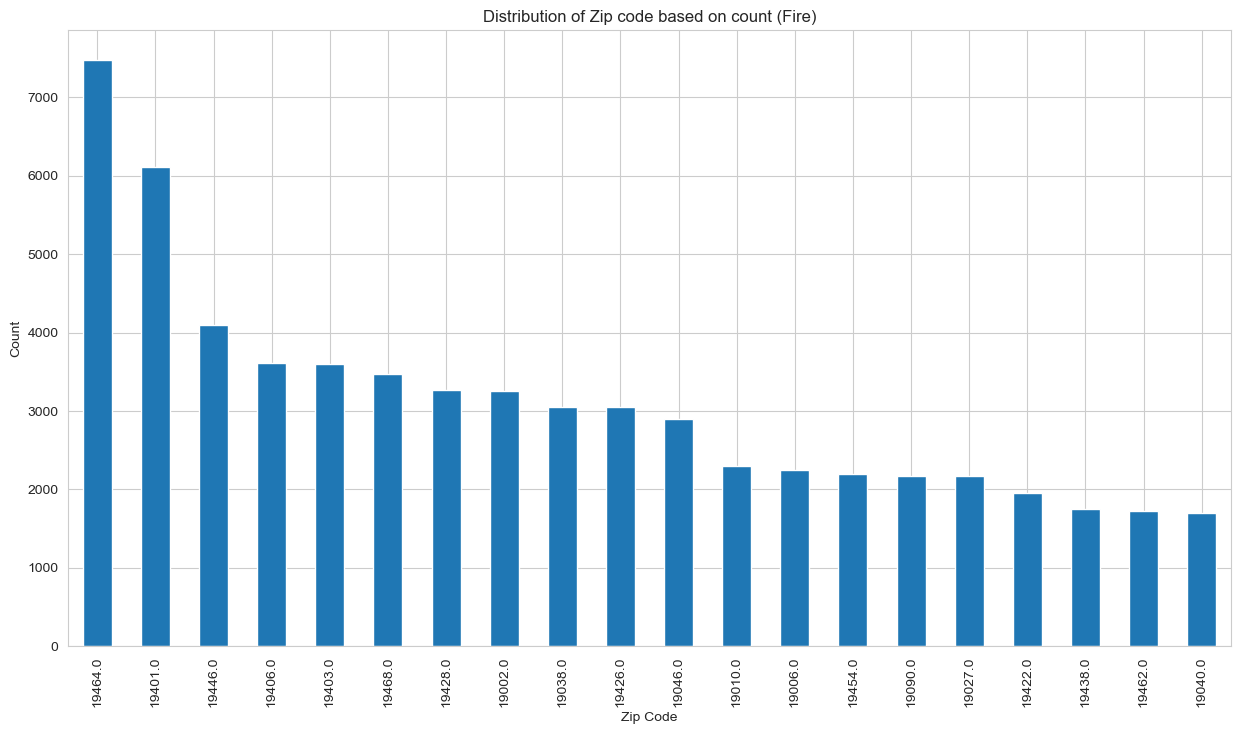

In [128]:
plt.figure(figsize=(15,8))
emergency_fire.groupby('zip').count().sort_values(by='title',ascending=False).iloc[0:20]['title'].plot(kind='bar')
plt.xlabel('Zip Code')
plt.ylabel('Count')
plt.title('Distribution of Zip code based on count (Fire)')
plt.show()

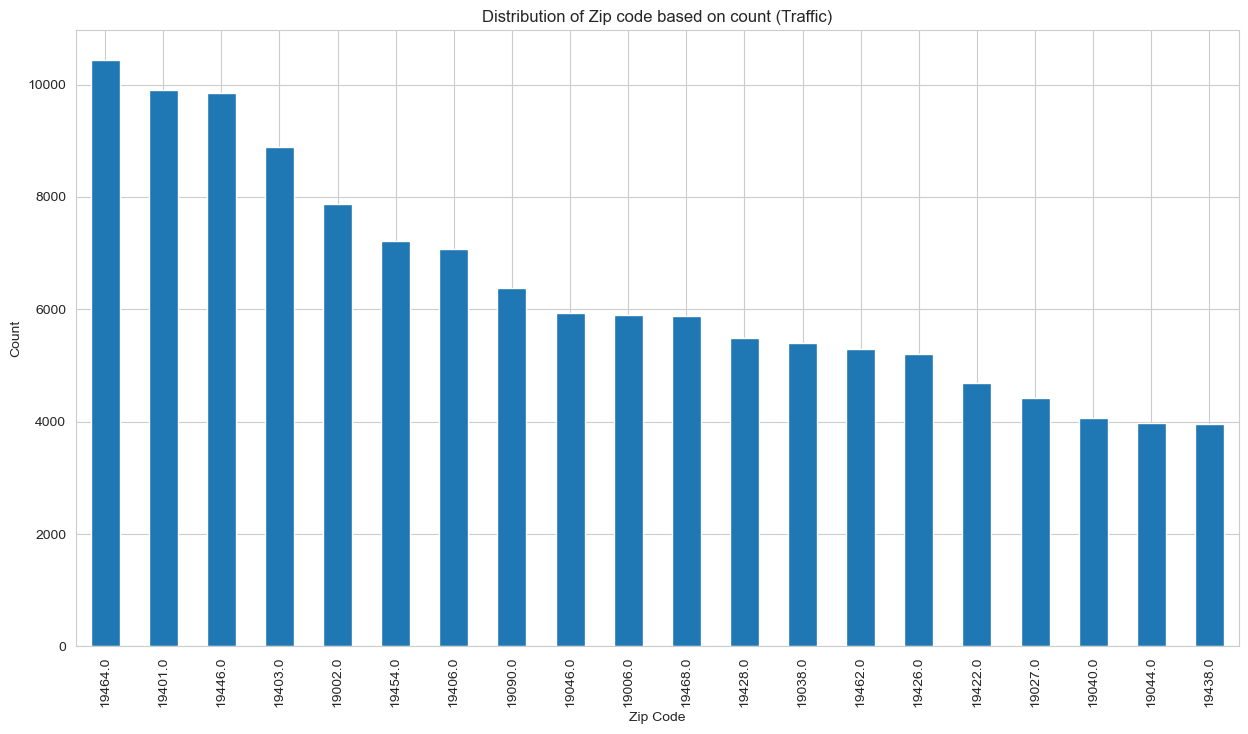

In [129]:
plt.figure(figsize=(15,8))
emergency_traffic.groupby('zip').count().sort_values(by='title',ascending=False).iloc[0:20]['title'].plot(kind='bar')
plt.xlabel('Zip Code')
plt.ylabel('Count')
plt.title('Distribution of Zip code based on count (Traffic)')
plt.show()

#### 19401 is the zip code from where most of calls are coming.
#### Although if we check based on calls the max number of EMS call is coming from 19401 rest are coming from 19464

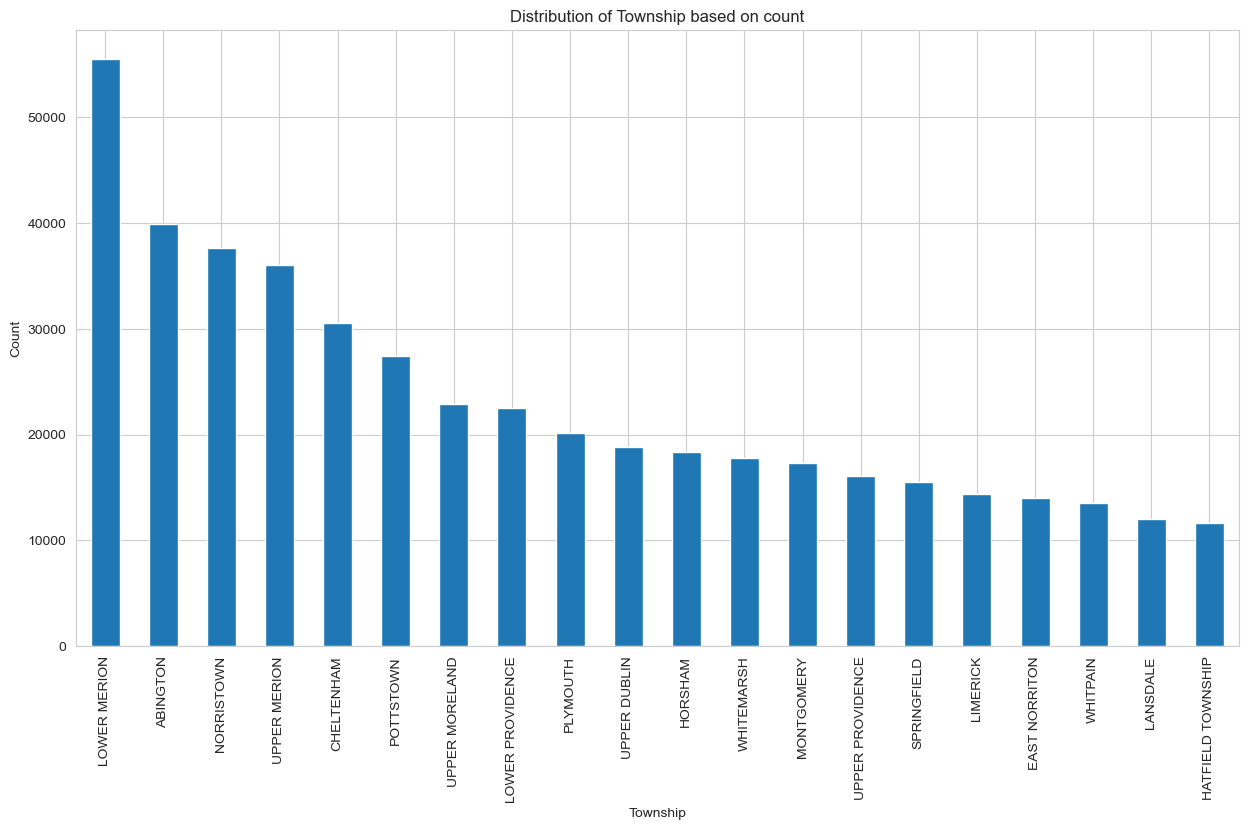

In [130]:
#Count plot based on township code
plt.figure(figsize=(15,8))
emergency.groupby('twp').count().sort_values(by='title',ascending=False).iloc[0:20]['title'].plot(kind='bar')
plt.xlabel('Township')
plt.ylabel('Count')
plt.title('Distribution of Township based on count')
plt.show()

#### Lower Merion is the township from where the most calls are coming

#### Now will check the township how it is distributed based on calls received. 

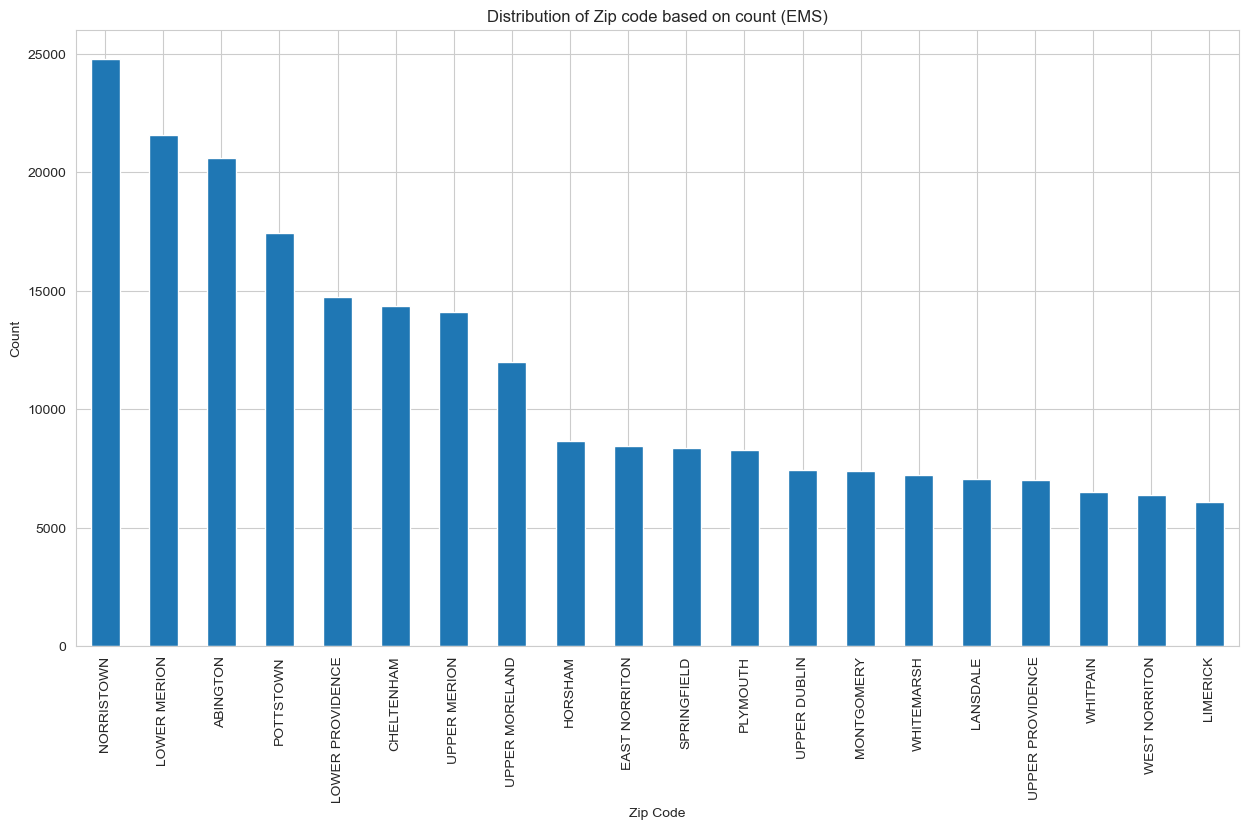

In [131]:
#Distribution of Zip code based on count (EMS)
plt.figure(figsize=(15,8))
emergency_ems.groupby('twp').count().sort_values(by='title',ascending=False).iloc[0:20]['title'].plot(kind='bar')
plt.xlabel('Zip Code')
plt.ylabel('Count')
plt.title('Distribution of Zip code based on count (EMS)')
plt.show()

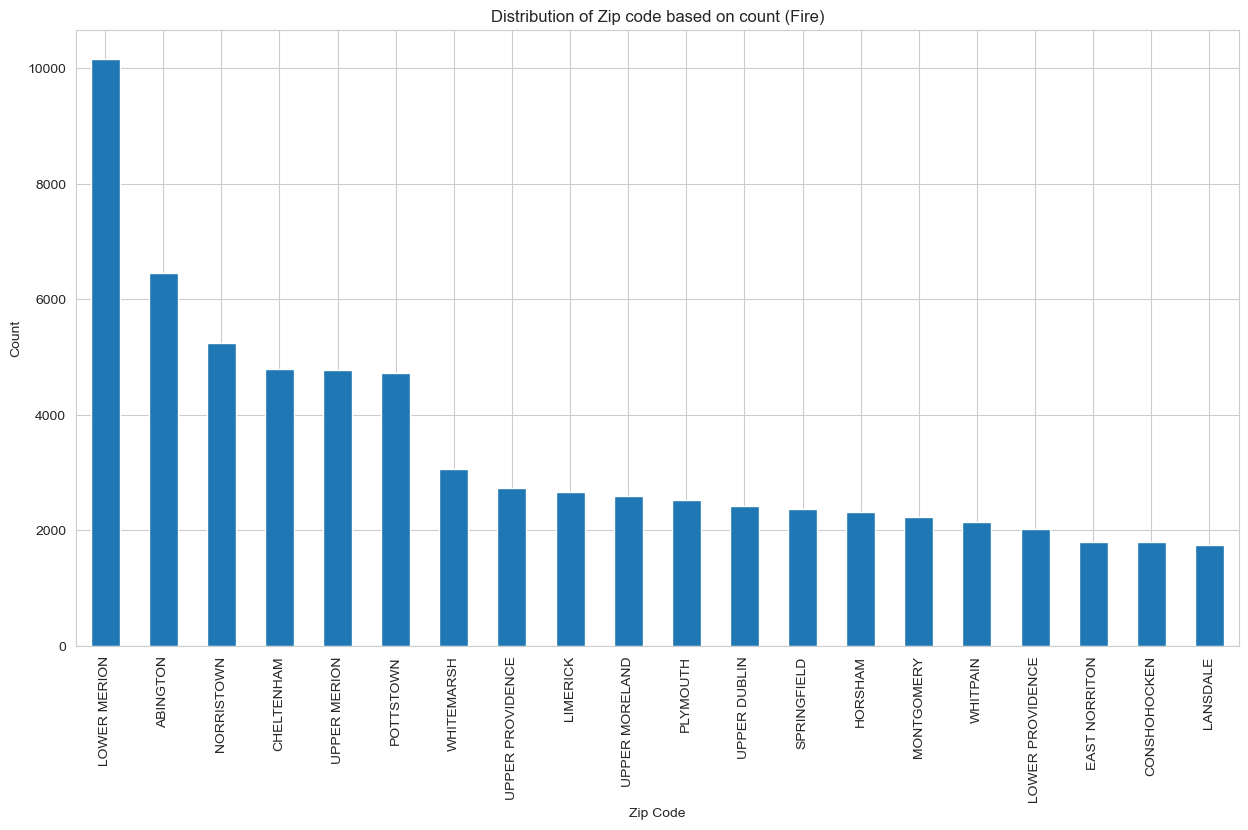

In [132]:
#Distribution of Zip code based on count (Fire)
plt.figure(figsize=(15,8))
emergency_fire.groupby('twp').count().sort_values(by='title',ascending=False).iloc[0:20]['title'].plot(kind='bar')
plt.xlabel('Zip Code')
plt.ylabel('Count')
plt.title('Distribution of Zip code based on count (Fire)')
plt.show()

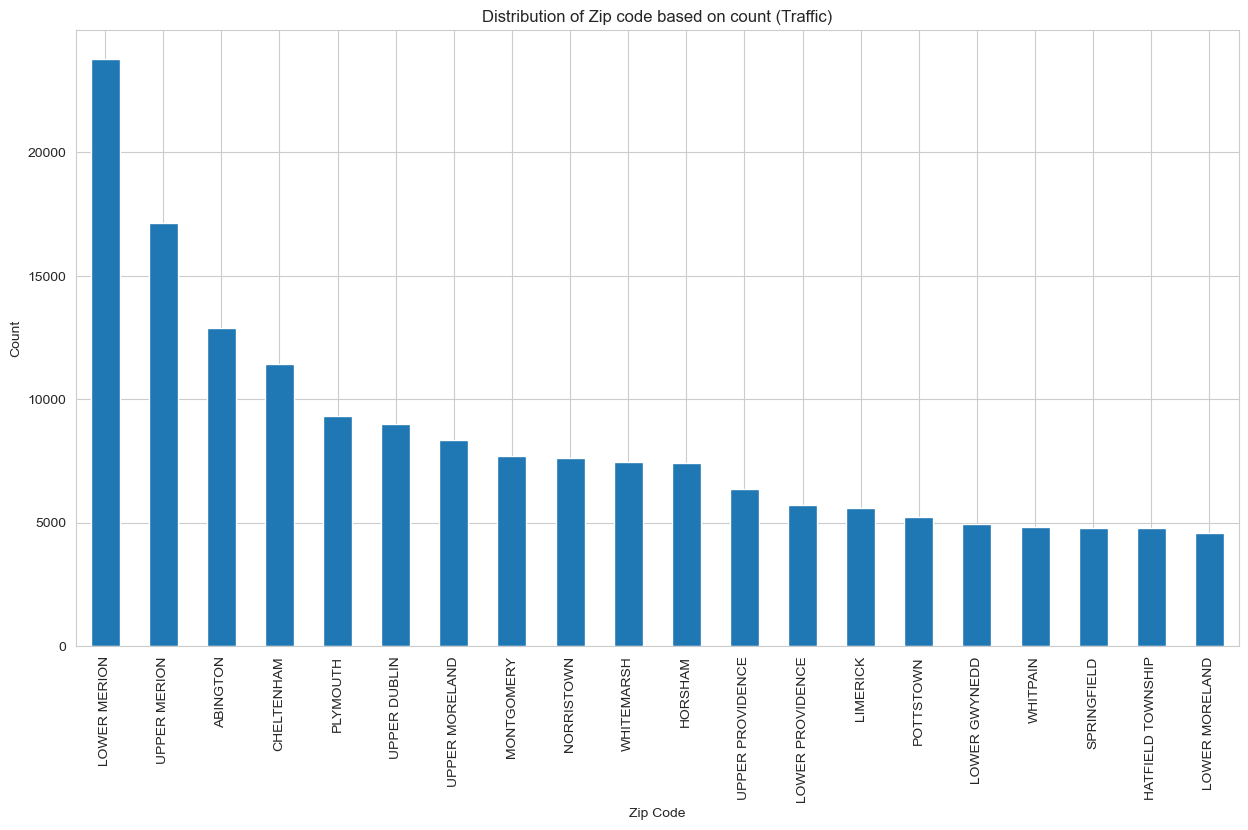

In [133]:
#Distribution of Zip code based on count (Traffic)
plt.figure(figsize=(15,8))
emergency_traffic.groupby('twp').count().sort_values(by='title',ascending=False).iloc[0:20]['title'].plot(kind='bar')
plt.xlabel('Zip Code')
plt.ylabel('Count')
plt.title('Distribution of Zip code based on count (Traffic)')
plt.show()

#### Based on township the max calls for traffic and fire is coming from Lower Merion but in case of EMS it is comming from Norristown . The township of Lower Merion and Abington is in Top 3 for each of the reasons of call .